In [2]:

library(tidyverse)
library(rstatix)    # Tests de hipÃ³tesis compatibles con tidyverse
library(PMCMRplus)  # Post hoc para tests no paramÃ©tricos
library(DescTools)  # Dunnet (post hoc con control)
library(ggpubr)     # GrÃ¡ficos

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




In [3]:
GraficoCajas = function (datos, variable_depend, variable_factor, titulo = ""){
  ggboxplot(datos, x =  variable_factor , y = variable_depend, 
            color = variable_factor, palette = "npg") + ggtitle(titulo)
}


GraficoCajasTest = function (datos, variable_depend, variable_factor, 
                            es_param, es_mr, test){
  grafico.cajas <- GraficoCajas(datos, variable_depend, variable_factor)
  titulo = MyTituloAnovaTest(es_param, es_mr, test)
  grafico.cajas + ggtitle(titulo)
}

GraficoCajasPost = function(datos, variable_depend, variable_factor, 
                            es_param, es_mr, test, 
                            control = "", estrellas = FALSE){
  grafico.cajas <- GraficoCajas(datos, variable_depend, variable_factor,)
  test <- test %>% add_xy_position() 
  titulo = MyTituloAnova(es_param, es_mr)
  titulo = paste0(titulo, "\nPost Hoc (pairwise comparisons -pwc-) para ")
  
  if (es_param){
    tit = "ANOVA"
  }
  else{
    if (!es_mr)
      tit = "Kruskal Wallis"
    else
      tit = "Friedmann"
  }
  
  titulo = paste0(titulo, tit, "\n")
  titulo = paste0(titulo, get_pwc_label(test, type = "text"))
  
  if (control != "")
    titulo = paste0(titulo, "\nGrupo de control: ", control)
  
  titulo = paste0(titulo, "\n")
  
  if (!estrellas)
    salida = "p.adj"
  else
    salida = "p.adj.signif"
  
  grafico.cajas + 
    stat_pvalue_manual(test, label = salida) +
    ggtitle(titulo)
}

MyTituloAnova = function(es_param = TRUE, es_mr = FALSE){
  titulo = "Test"
  
  if (es_param == FALSE)
    titulo = paste0(titulo, " no")
  
  titulo = paste0(titulo, " paramÃ©trico")
  
  if (es_mr == TRUE)
    titulo = paste0(titulo, " de medidas repetidas")
  
  titulo
}

MyTituloAnovaTest = function(es_param = TRUE, es_mr = FALSE, test){
  titulo = MyTituloAnova(es_param, es_mr)
  titulo = paste0(titulo, "\n", get_test_label(test,  
                                               detailed = TRUE, 
                                               type = "text"))
  # TambiÃ©n podrÃ­amos haber usado description
  titulo
}


In [ ]:
Cargamos los datos

In [5]:
load("DatosEmpleados.RData")
datos = DatosEmpleados
v.depend = "salario"
v.factor.2.valores = "sexo"
indice.col.factor.2valores = which(colnames(datos) == v.factor.2.valores)
datos[,indice.col.factor.2valores] = as.factor(as.data.frame(datos)[,indice.col.factor.2valores])

In [6]:
head(datos)

,Id,sexo,fechnac,educ,catlab,salario,salini,tiempemp,expprev,minoría
,<int>,<fct>,<chr>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>
1,1,Hombre,2/3/1952,15,Directivo,57000,27000,98,144,No
2,2,Hombre,5/23/1958,16,Administrativo,40200,18750,98,36,No
3,3,Mujer,7/26/1929,12,Administrativo,21450,12000,98,381,No
4,4,Mujer,4/15/1947,8,Administrativo,21900,13200,98,190,No
5,5,Hombre,2/9/1955,15,Administrativo,45000,21000,98,138,No
6,6,Hombre,8/22/1958,15,Administrativo,32100,13500,98,67,No


Algunos test utilizan formulas para especificar la variable dependiente y de agrupación. Lo suyo es guardarla en variables

In [7]:
formula.t.test = as.formula(paste0(v.depend, "~", v.factor.2.valores))  # 2 muestras independientes

In [8]:
formula.t.test

salario ~ sexo

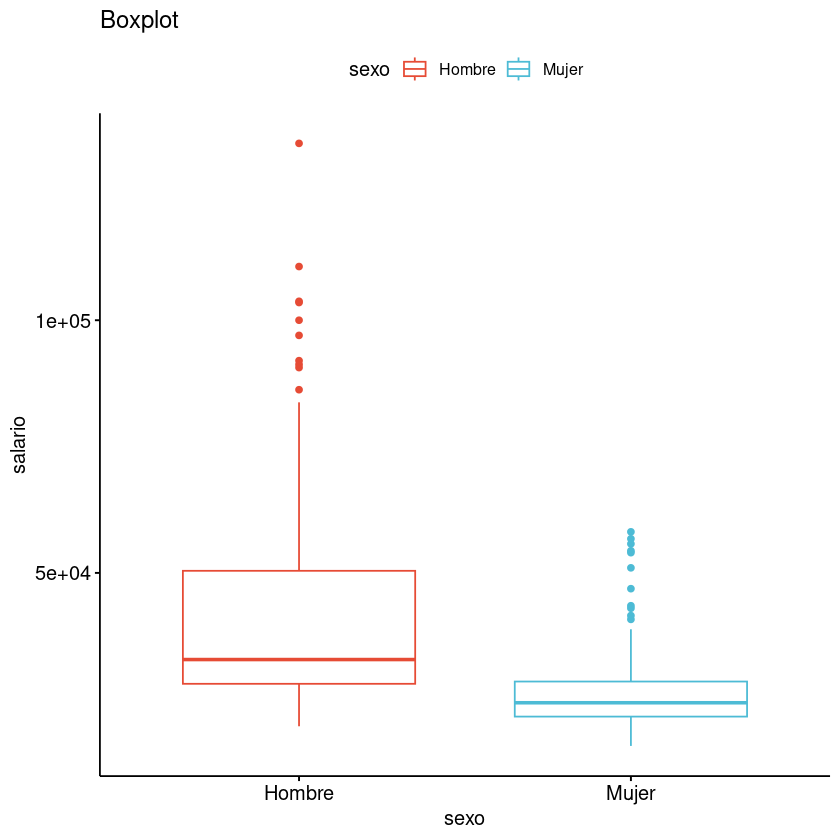

In [9]:
GraficoCajas(datos, v.depend, v.factor.2.valores, "Boxplot")


In [12]:
test_homoc_levene <- levene_test(formula.t.test, data=datos)
test_homoc_levene

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,472,51.60252,2.665614e-12


In [13]:
test_welch <- welch_anova_test(formula = formula.t.test, data=datos)

In [14]:
test_welch

,.y.,n,statistic,DFn,DFd,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,salario,474,136.62,1,344.2625,8.3e-27,Welch ANOVA


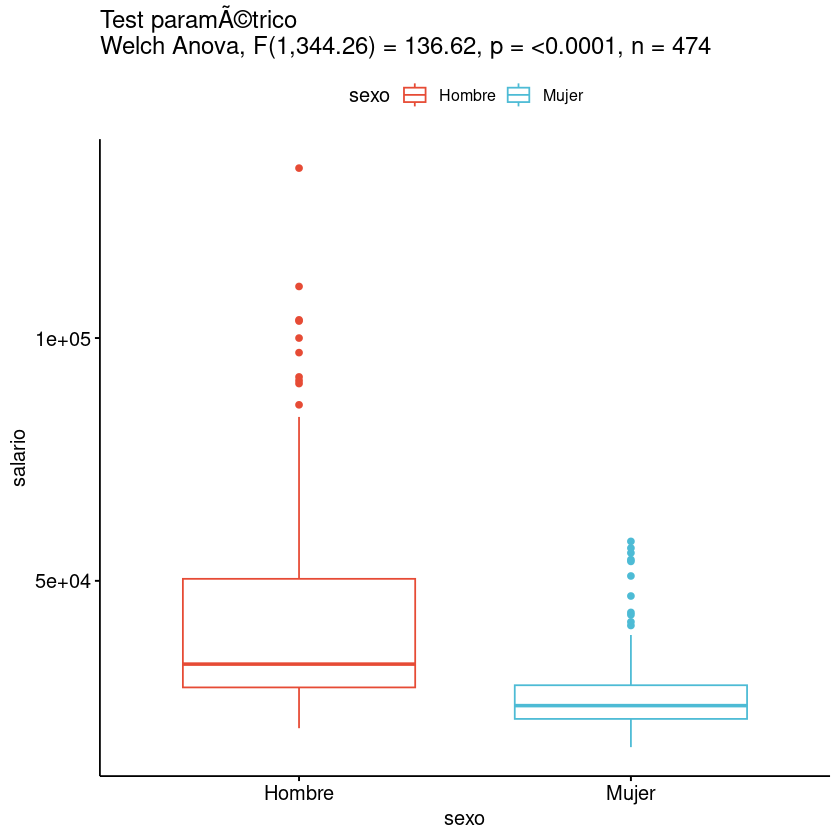

In [15]:
GraficoCajasTest(datos, v.depend, v.factor.2.valores, 
                 es_param = TRUE, es_mr = FALSE, test_welch)


## ANOVA Para 2 muestras independientes (parametrico)

In [18]:
Residuos = function (data, var.depend, var.factor){
  formula.anova = as.formula(paste0(var.depend, "~", var.factor))  # k>2 muestras independientes
  test_anova = anova_test(formula = formula.anova, data = data)
  modelo_test = attr(test_anova, "args")$model
  residuals(modelo_test)
}

In [19]:
test_anova_2muestras = anova_test(formula.t.test, data = datos)
residuos_test_anova_2muestras = Residuos(datos, v.depend, v.factor.2.valores)


	Shapiro-Wilk normality test

data:  residuos_test_anova_2muestras
W = 0.83621, p-value < 2.2e-16


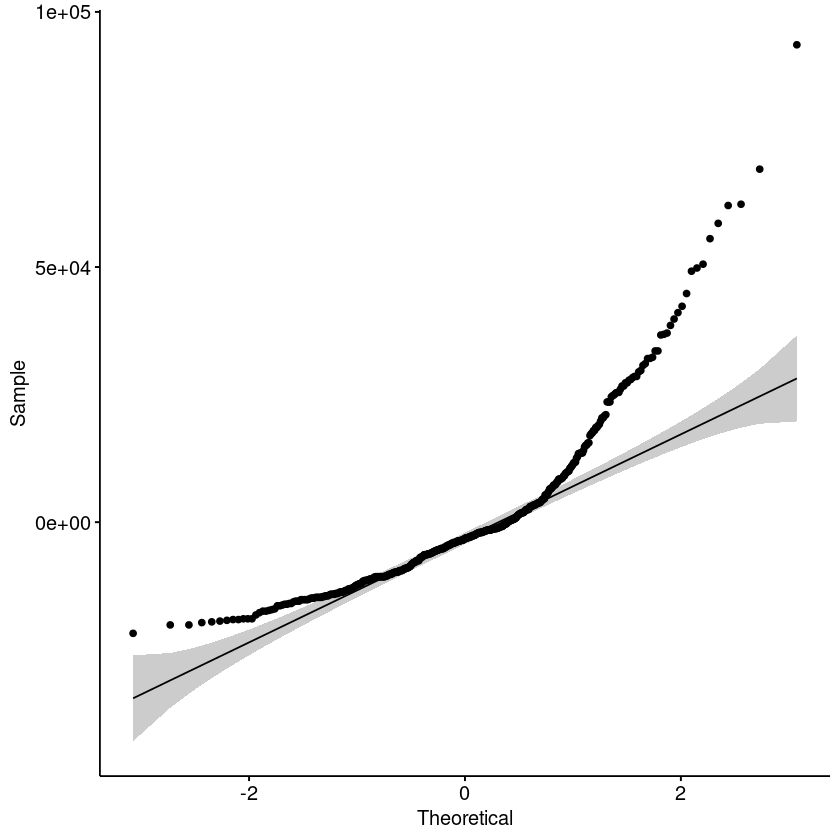

In [20]:
test_normalidad_residuos = shapiro.test(x = residuos_test_anova_2muestras)
test_normalidad_residuos
## 
##  Shapiro-Wilk normality test
## 
## data:  residuos_test_anova_2muestras
## W = 0.83621, p-value < 2.2e-16
ggqqplot(residuos_test_anova_2muestras)

## Test no parametrico para dos muestras independientes

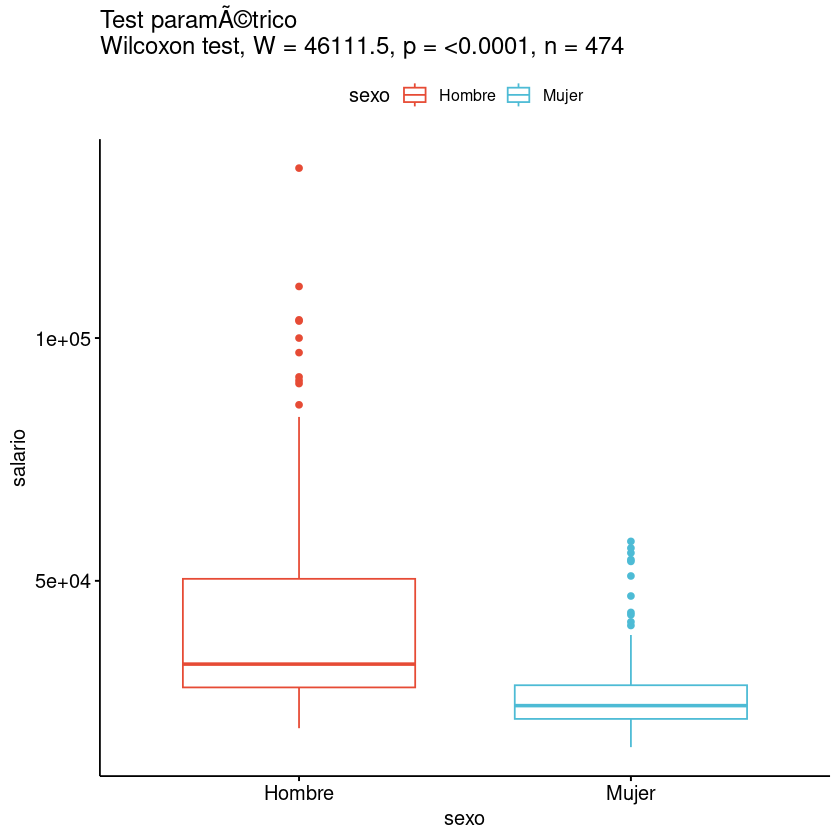

In [21]:
test_mann_whitney = wilcox_test(data = datos, formula = formula.t.test)
GraficoCajasTest(datos, v.depend, v.factor.2.valores, 
                 es_param = TRUE, es_mr = FALSE, test_mann_whitney)

## Test ANOVA Para K muestras independientes

In [22]:
v.factor = "catlab"
indice.col.factor = which(colnames(datos) == v.factor)
datos[,indice.col.factor] = as.factor(as.data.frame(datos)[,indice.col.factor]) 
formula.anova = as.formula(paste0(v.depend, "~", v.factor))  # k>2 muestras independientes

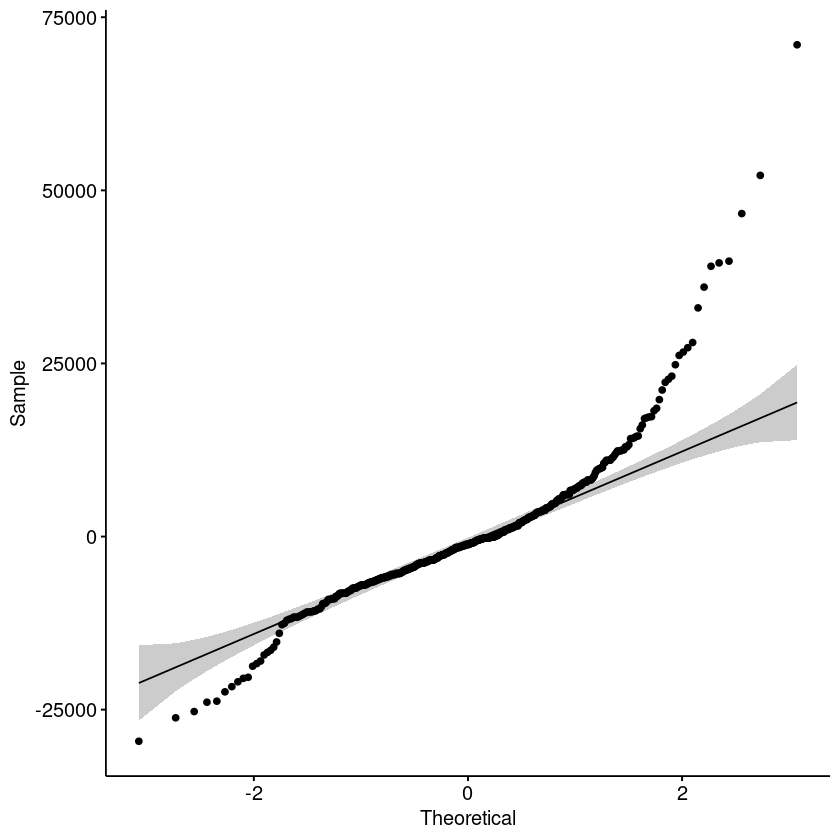

In [23]:
residuos.anova = Residuos (data = datos, v.depend, v.factor)
ggqqplot(residuos.anova)

In [24]:
test_homoc_levene = levene_test(formula.anova, data = datos)
test_homoc_levene
## # A tibble: 1 × 4
##     df1   df2 statistic        p
##   <int> <int>     <dbl>    <dbl>
## 1     2   471      51.2 7.65e-21

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,471,51.18872,7.649994e-21


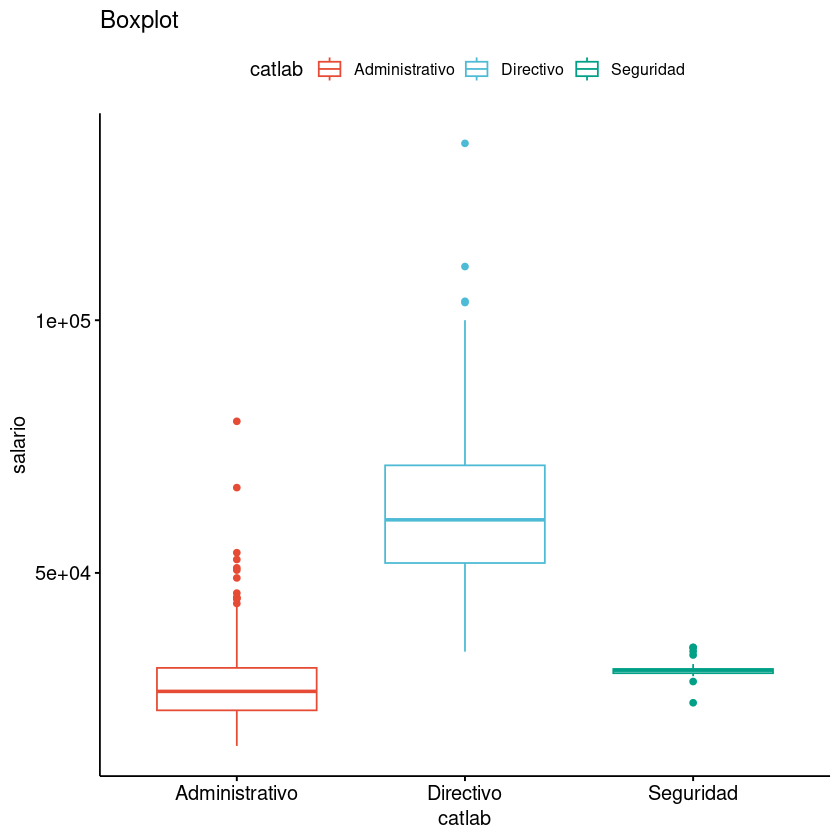

In [25]:
GraficoCajas(datos, v.depend, v.factor, "Boxplot")


In [28]:
test_homoc_welch <- welch_anova_test(datos,formula.anova)
test_homoc_welch

,.y.,n,statistic,DFn,DFd,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,salario,474,162.2,2,117.3115,1.68e-34,Welch ANOVA


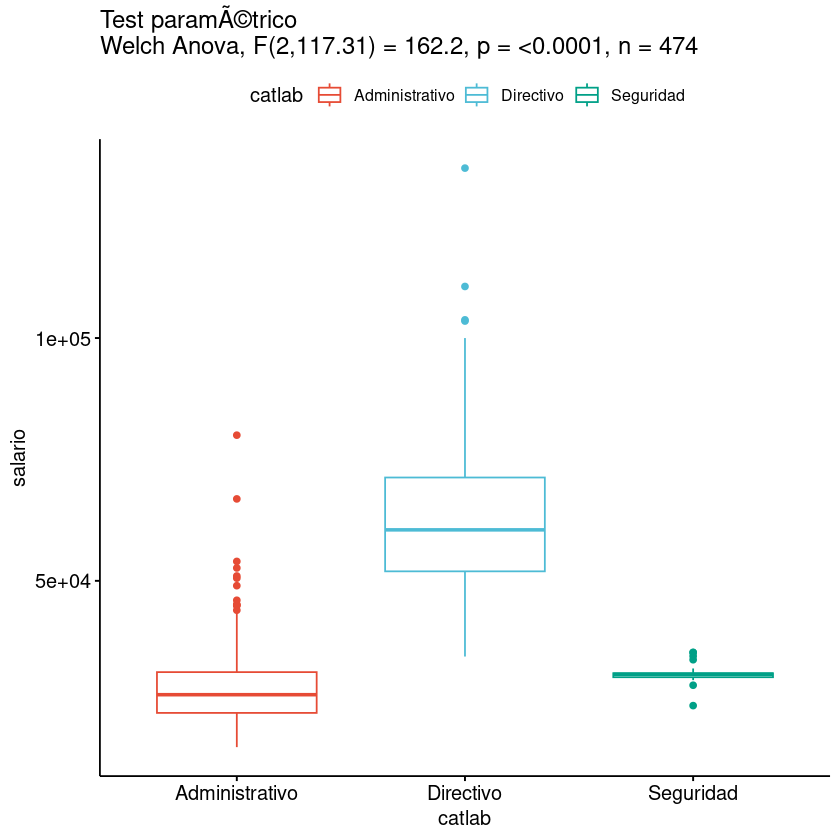

In [30]:
GraficoCajasTest(datos, v.depend, v.factor, 
                 es_param = TRUE, es_mr = FALSE, test_homoc_welch)

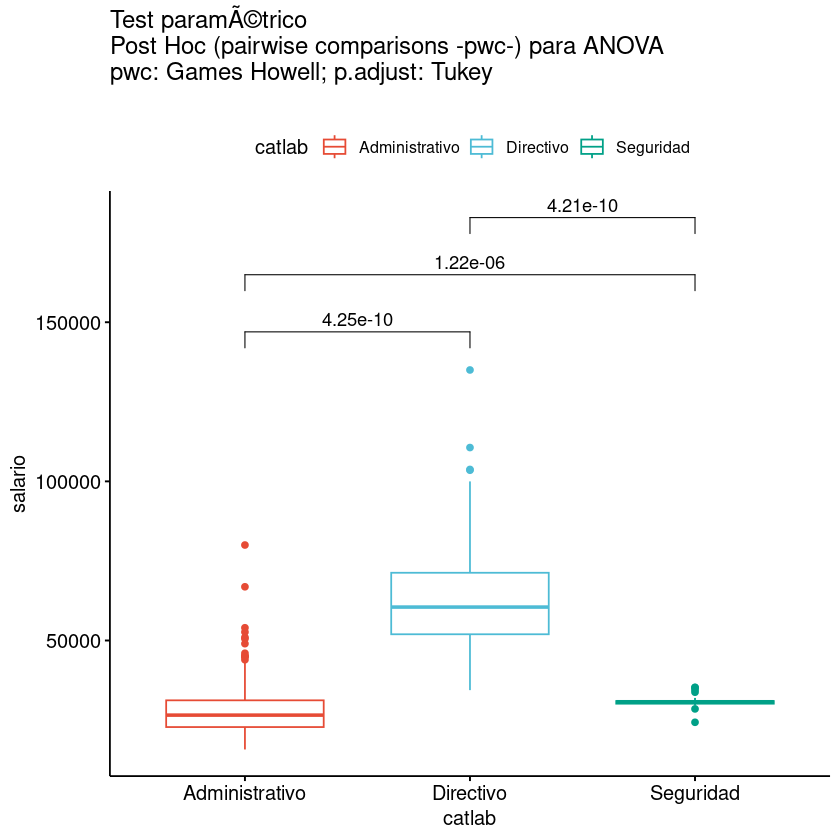

In [26]:
post_games_howell <- games_howell_test(datos, formula.anova)     
GraficoCajasPost(datos, v.depend, v.factor, 
                 es_param = TRUE , es_mr = FALSE, post_games_howell)

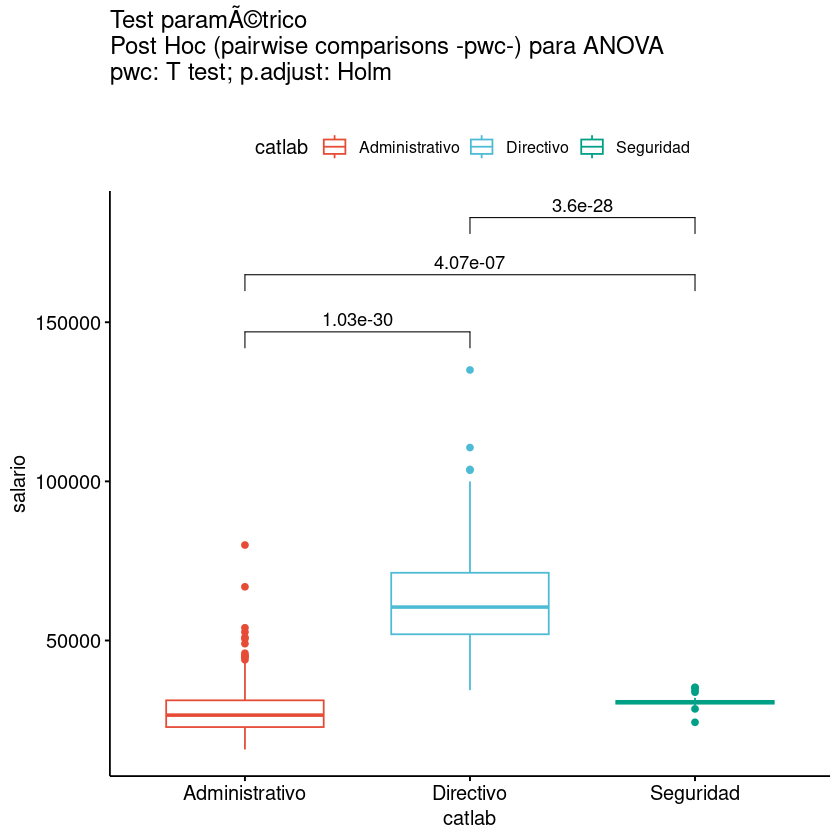

In [31]:
post_pw_t_test <- pairwise_t_test (formula.anova, data = datos,
                                   pool.sd = FALSE)
GraficoCajasPost(datos, v.depend, v.factor , 
                 es_param = TRUE , es_mr = FALSE, post_pw_t_test)

## Anova K muestras independientes (no parametrico)

In [32]:
test_Kruskal_Wallis <- kruskal_test(datos,formula.anova)
test_Kruskal_Wallis

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,salario,474,207.6795,2,8e-46,Kruskal-Wallis


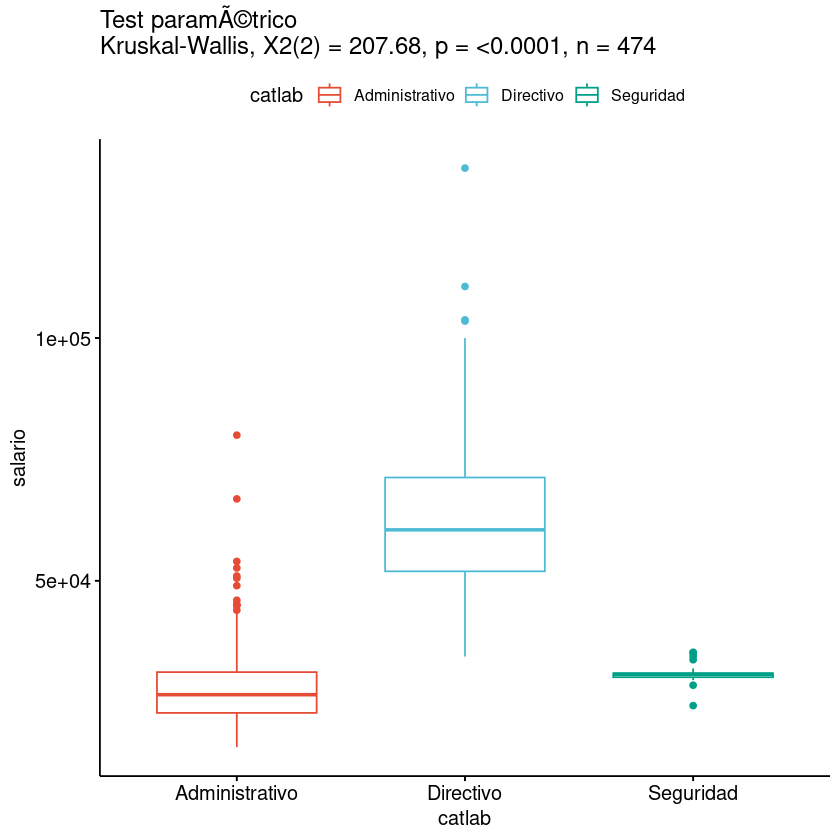

In [33]:
GraficoCajasTest(datos, v.depend, v.factor, 
                 es_param = TRUE, es_mr = FALSE, test_Kruskal_Wallis)

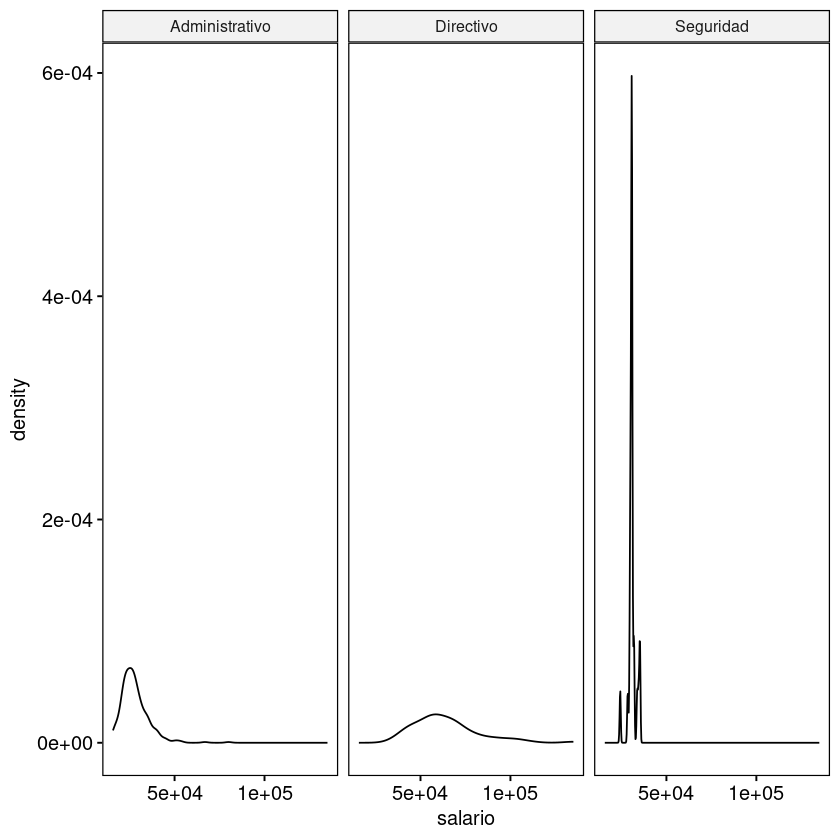

In [34]:
ggdensity(as.data.frame(datos), v.depend, facet.by = v.factor)


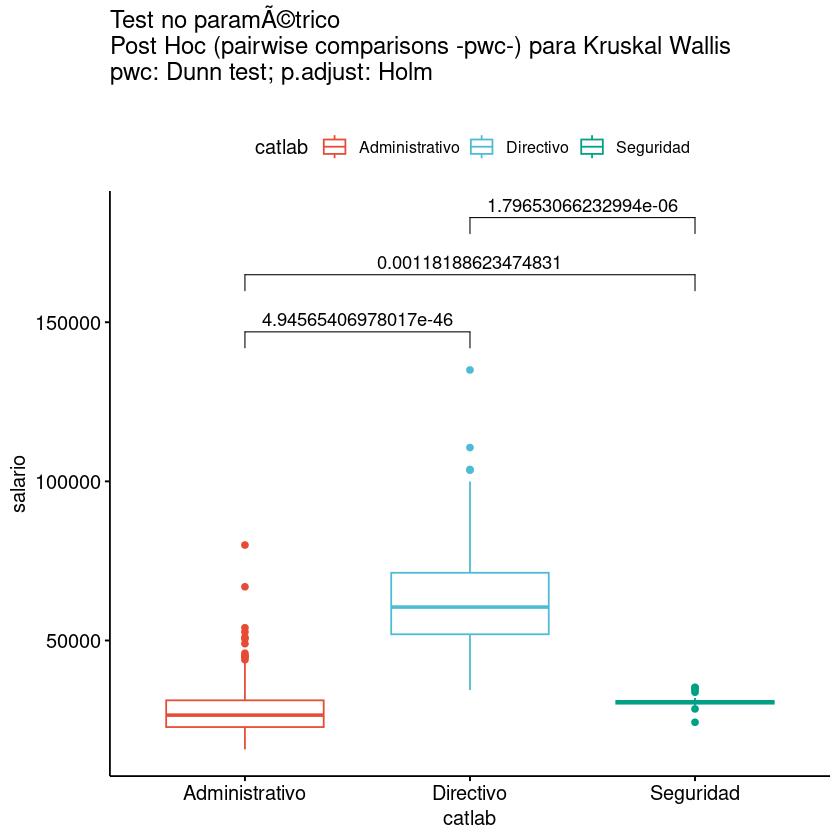

In [35]:
post_kw_dunn = dunn_test(formula.anova, data = datos)
GraficoCajasPost(datos, v.depend, v.factor,  
                 es_param = FALSE , es_mr = FALSE, post_kw_dunn)

In [36]:
post_kw_conover = kwAllPairsConoverTest(formula.anova, data = datos,
                                        p.adjust.method = "holm")
post_kw_conover

Warning message in kwAllPairsConoverTest.default(c(57000L, 40200L, 21450L, 21900L, :
“Ties are present. Quantiles were corrected for ties.”

	Pairwise comparisons using Conover's all-pairs test


data: salario by catlab



P value adjustment method: holm



          Administrativo Directivo
Directivo < 2e-16        -        
Seguridad 1.9e-05        3.1e-10  

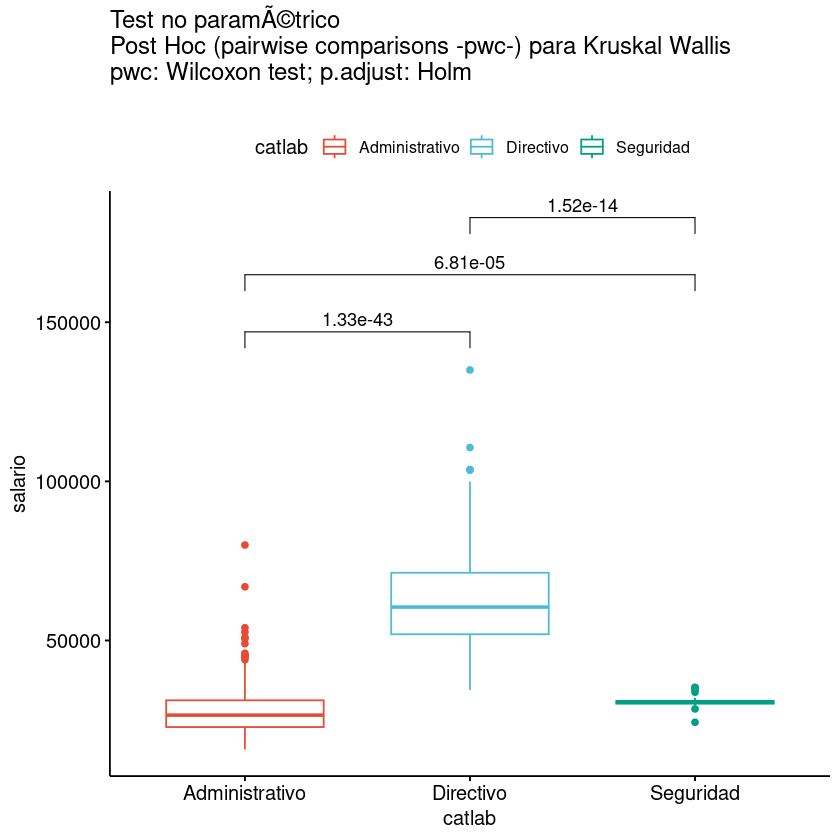

In [37]:
post_kw_wilc = wilcox_test(formula.anova, data = datos)
GraficoCajasPost(datos, v.depend, v.factor, 
                 es_param = FALSE, es_mr = FALSE, post_kw_wilc)

##  TEST PARA MUESTRAS REPETIDAS

In [39]:
col.salario.inicial = datos$salario
col.salario.final = datos$salini
t.test.mr = t.test(col.salario.inicial, col.salario.final, 
                   paired = TRUE)
t.test.mr


	Paired t-test

data:  col.salario.inicial and col.salario.final
t = 35.036, df = 473, p-value < 2.2e-16
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 16427.41 18379.56
sample estimates:
mean difference 
       17403.48 


In [40]:
datos.mr.wide = DatosEmpleados
v.id.mr = "Id"
columnas.mr = c("salario", "salini")
v.depend.mr = "Salario"
v.factor.mr = "Tiempo"
datos.mr.long = pivot_longer(datos.mr.wide, 
                             cols = any_of(columnas.mr), 
                             names_to = v.factor.mr,
                             values_to = v.depend.mr)

In [41]:
datos.mr.wide[1:3,]

,Id,sexo,fechnac,educ,catlab,salario,salini,tiempemp,expprev,minoría
,<int>,<fct>,<chr>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>
1,1,Hombre,2/3/1952,15,Directivo,57000,27000,98,144,No
2,2,Hombre,5/23/1958,16,Administrativo,40200,18750,98,36,No
3,3,Mujer,7/26/1929,12,Administrativo,21450,12000,98,381,No


In [42]:
datos.mr.long[1:6,]

Id,sexo,fechnac,educ,catlab,tiempemp,expprev,minoría,Tiempo,Salario
<int>,<fct>,<chr>,<int>,<fct>,<int>,<int>,<fct>,<chr>,<int>
1,Hombre,2/3/1952,15,Directivo,98,144,No,salario,57000
1,Hombre,2/3/1952,15,Directivo,98,144,No,salini,27000
2,Hombre,5/23/1958,16,Administrativo,98,36,No,salario,40200
2,Hombre,5/23/1958,16,Administrativo,98,36,No,salini,18750
3,Mujer,7/26/1929,12,Administrativo,98,381,No,salario,21450
3,Mujer,7/26/1929,12,Administrativo,98,381,No,salini,12000


In [43]:
indice.col.id.mr = which(colnames(datos.mr.long) == v.id.mr)
indice.col.factor.mr = which(colnames(datos.mr.long) == v.factor.mr)
datos.mr.long[,indice.col.id.mr] = as.factor(as.data.frame(datos.mr.long)[,indice.col.id.mr])
datos.mr.long[,indice.col.factor.mr] =as.factor(as.data.frame(datos.mr.long)[,indice.col.factor.mr])

In [44]:
formula.mr.sin.error = Salario ~ Tiempo

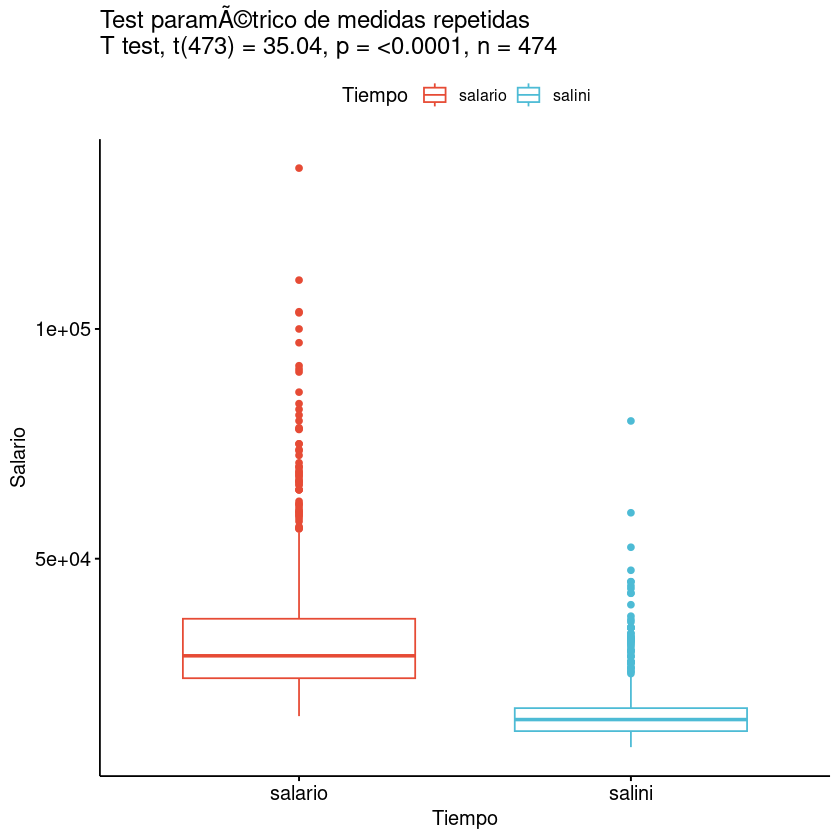

In [45]:
test_t_mr <- t_test(formula = formula.mr.sin.error, 
                    data = datos.mr.long, paired = TRUE) 
GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,  
                 es_param = TRUE, es_mr = TRUE, test_t_mr)    


	Shapiro-Wilk normality test

data:  col.mr.1 - col.mr.2
W = 0.78168, p-value < 2.2e-16


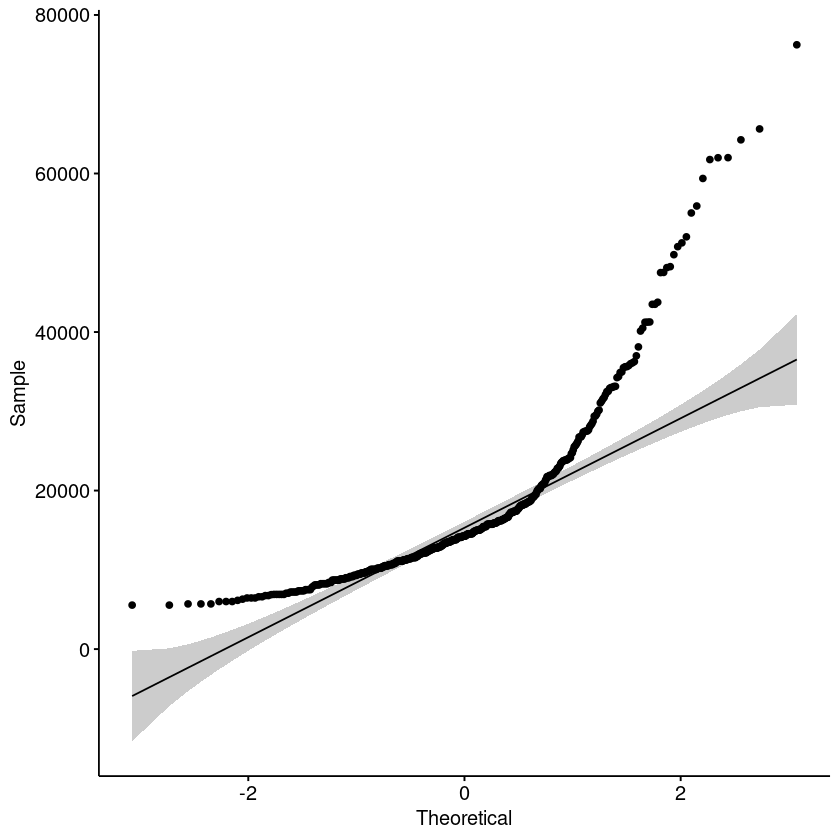

In [47]:
col.mr.1 = datos.mr.wide[,columnas.mr[1]]
col.mr.2 = datos.mr.wide[,columnas.mr[2]]
shapiro.test(x = col.mr.1 - col.mr.2)
ggqqplot(col.mr.1 - col.mr.2)

## dos muestras repetidas (no parametrico)

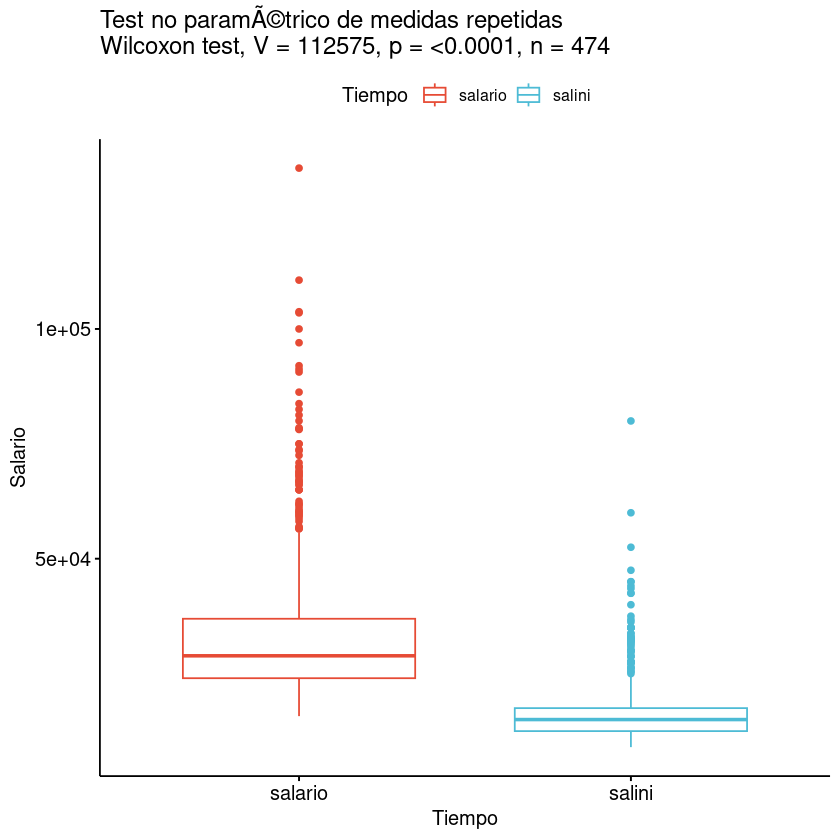

In [48]:
test_wilcoxon_mr = wilcox_test(formula.mr.sin.error, data = datos.mr.long, 
                               paired = TRUE)
GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = FALSE, es_mr = TRUE ,
                 test_wilcoxon_mr)

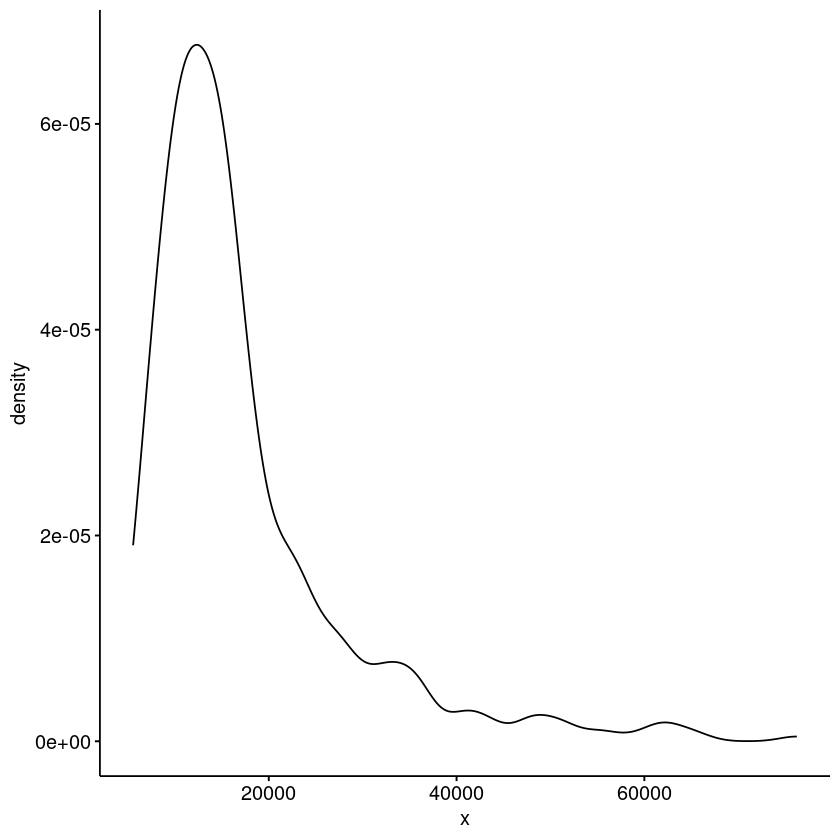

In [49]:
diferencias = col.mr.1 - col.mr.2
ggdensity(data = diferencias)

In [50]:
median(diferencias)

[1] 14250

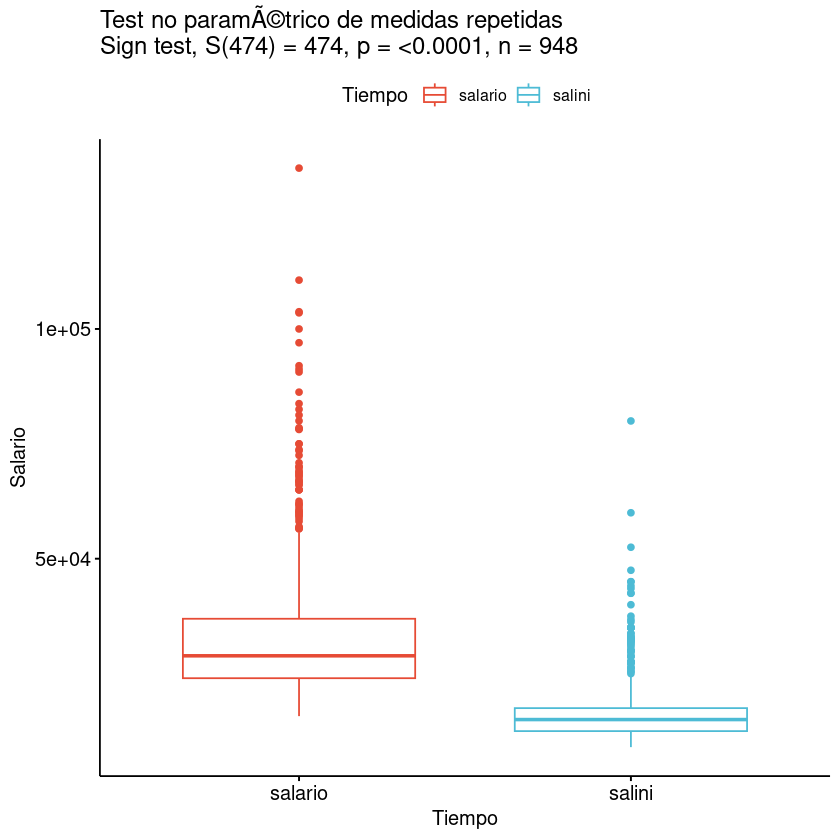

In [51]:
test_sign_mr = sign_test(formula.mr.sin.error, data = datos.mr.long)

GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = FALSE, es_mr = TRUE ,
                 test_sign_mr)

## Anova K muestras dependientes (parametrico)

In [52]:
load("Cholesterol.RData")
datos.mr.wide = Cholesterol
nombres.columnas = colnames(datos.mr.wide)  
v.id.mr = nombres.columnas[1]  # El identific. es la primera columna
v.depend.mr = "NivelColesterol"
v.factor.mr = "Tiempo"
columnas.mr = nombres.columnas[-1]  # El resto de columnas son las MR

datos.mr.long = pivot_longer(datos.mr.wide, 
                             cols = any_of(columnas.mr), 
                             names_to = v.factor.mr,
                             values_to = v.depend.mr)

indice.col.id.mr = which(colnames(datos.mr.long) == v.id.mr)
indice.col.factor.mr = which(colnames(datos.mr.long) == v.factor.mr)
datos.mr.long[,indice.col.id.mr] = as.factor(as.data.frame(datos.mr.long)[,indice.col.id.mr])
datos.mr.long[,indice.col.factor.mr] =as.factor(as.data.frame(datos.mr.long)[,indice.col.factor.mr])

formula.mr.sin.error = as.formula(paste0(v.depend.mr, "~", v.factor.mr))

In [53]:
datos.mr.wide[1:3,]

,ID,Before,After4weeks,After8weeks
,<int>,<dbl>,<dbl>,<dbl>
1,1,6.42,5.83,5.75
2,2,6.76,6.20,6.13
3,3,6.56,5.83,5.71


In [55]:
datos.mr.long[1:9,]

ID,Tiempo,NivelColesterol
<fct>,<fct>,<dbl>
1,Before,6.42
1,After4weeks,5.83
1,After8weeks,5.75
2,Before,6.76
2,After4weeks,6.20
2,After8weeks,6.13
3,Before,6.56
3,After4weeks,5.83
3,After8weeks,5.71


In [57]:
formula.anova.mr.error = as.formula(paste0(v.depend.mr, "~", 
                                    v.factor.mr, "+ Error(" , 
                                    v.id.mr , "/" , v.factor.mr , ")"))
formula.anova.mr.error

NivelColesterol ~ Tiempo + Error(ID/Tiempo)

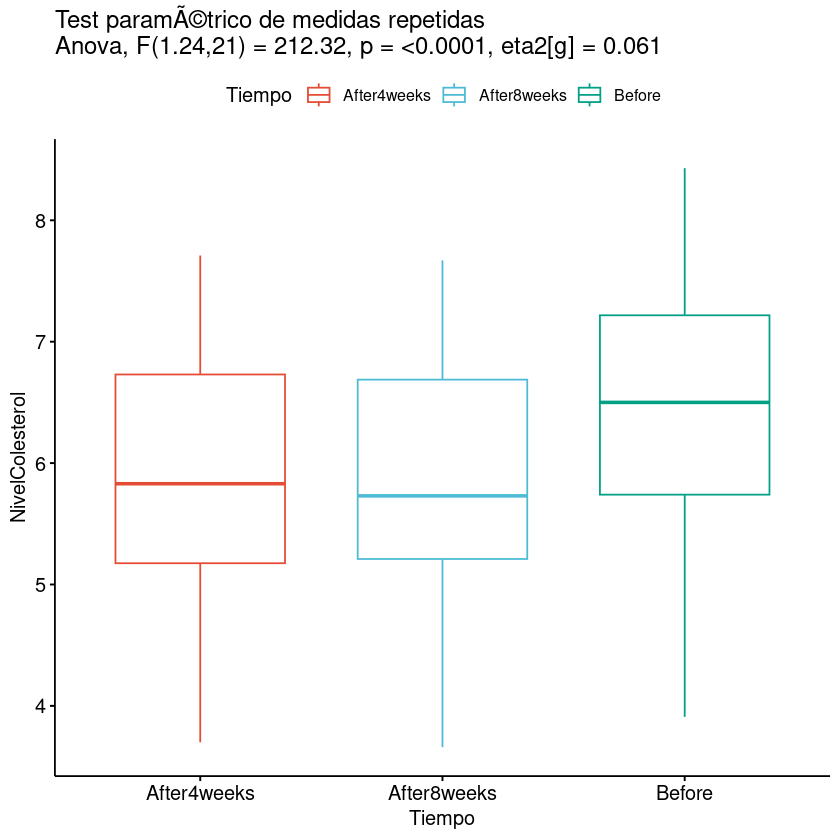

In [58]:
test_anova_mr <- anova_test(formula = formula.anova.mr.error, 
                            data = datos.mr.long) 
GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,  
                 es_param = TRUE, es_mr = TRUE, test_anova_mr)    

In [59]:
ResiduosMR = function(data.long, var.depend.mr, var.factor.mr, var.id.mr, columnas.mr){
  formula.anova.mr.error = as.formula(paste0(var.depend.mr, "~", 
                                    var.factor.mr, "+ Error(" , 
                                    var.id.mr , "/" , var.factor.mr , ")"))
  test_anova_mr = anova_test(formula.anova.mr.error, data = data.long)
  residuos_anova_test_mr = residuals(attr(test_anova_mr, "args")$model)
  # Me da los residuos por cada columna, por lo que hay que agregarlos todos:
  residuos.juntos.mr = pivot_longer(as.data.frame(residuos_anova_test_mr), 
                                    cols = any_of(columnas.mr))
  residuos.juntos.mr  = residuos.juntos.mr$value
}

NivelColesterol ~ Tiempo + Error(ID/Tiempo)

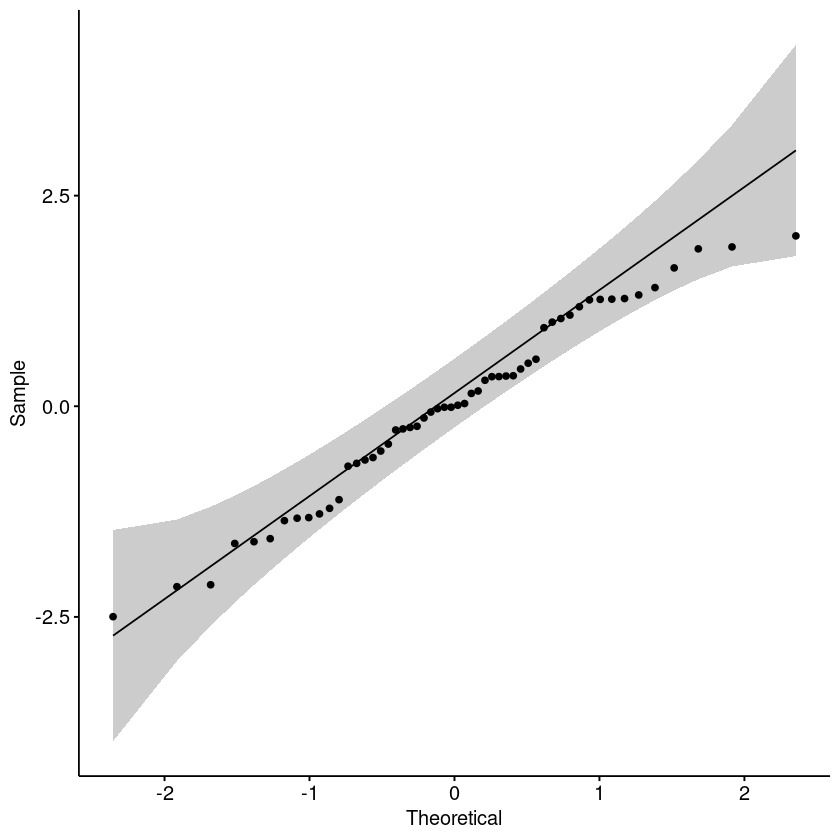

In [60]:
formula.anova.mr.error
## NivelColesterol ~ Tiempo + Error(ID/Tiempo)
residuos.mr = ResiduosMR(datos.mr.long, v.depend.mr, v.factor.mr,
                         v.id.mr, columnas.mr)
ggqqplot(residuos.mr)  

NivelColesterol ~ Tiempo

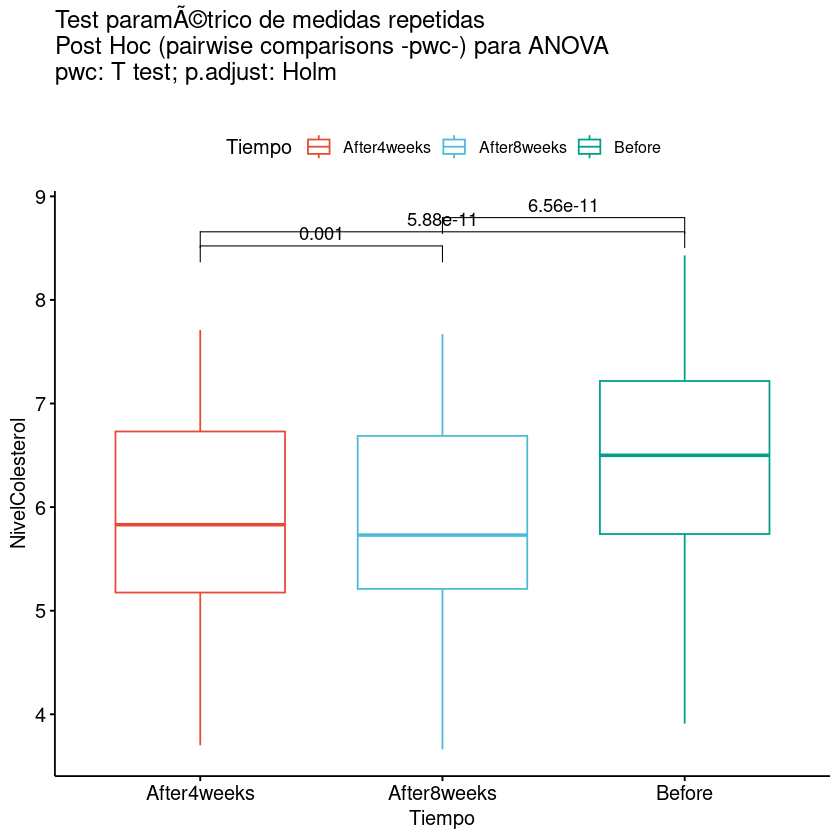

In [61]:
formula.mr.sin.error = as.formula(paste0(v.depend.mr, "~", v.factor.mr))
formula.mr.sin.error
## NivelColesterol ~ Tiempo

post_pw_t_test_mr = pairwise_t_test(formula.mr.sin.error, 
                                    data = datos.mr.long,
                                    paired = TRUE,
                                    p.adjust.method = "holm")
GraficoCajasPost(datos.mr.long, v.depend.mr, v.factor.mr, 
                 es_param = TRUE , es_mr = TRUE,
                 post_pw_t_test_mr)

## Anova k muestras dependientes (no parametrico)

In [62]:
load("CommercialRatings.RData")
datos.mr.wide = CommercialRatings
nombres.columnas = colnames(datos.mr.wide)  
v.id.mr = nombres.columnas[1]  # El identific. es la primera columna
v.depend.mr = "Valoracion"
v.factor.mr = "Marca"
columnas.mr = nombres.columnas[-1]  # El resto de columnas son las MR

datos.mr.long = pivot_longer(datos.mr.wide, 
                             cols = any_of(columnas.mr), 
                             names_to = v.factor.mr,
                             values_to = v.depend.mr)

indice.col.id.mr = which(colnames(datos.mr.long) == v.id.mr)
indice.col.factor.mr = which(colnames(datos.mr.long) == v.factor.mr)
datos.mr.long[,indice.col.id.mr] = as.factor(as.data.frame(datos.mr.long)[,indice.col.id.mr])
datos.mr.long[,indice.col.factor.mr] =as.factor(as.data.frame(datos.mr.long)[,indice.col.factor.mr])

In [63]:
formula.anova.friedman_test = as.formula(paste0(v.depend.mr, "~", 
                                                v.factor.mr , "|" , 
                                                v.id.mr))

Valoracion ~ Marca | id

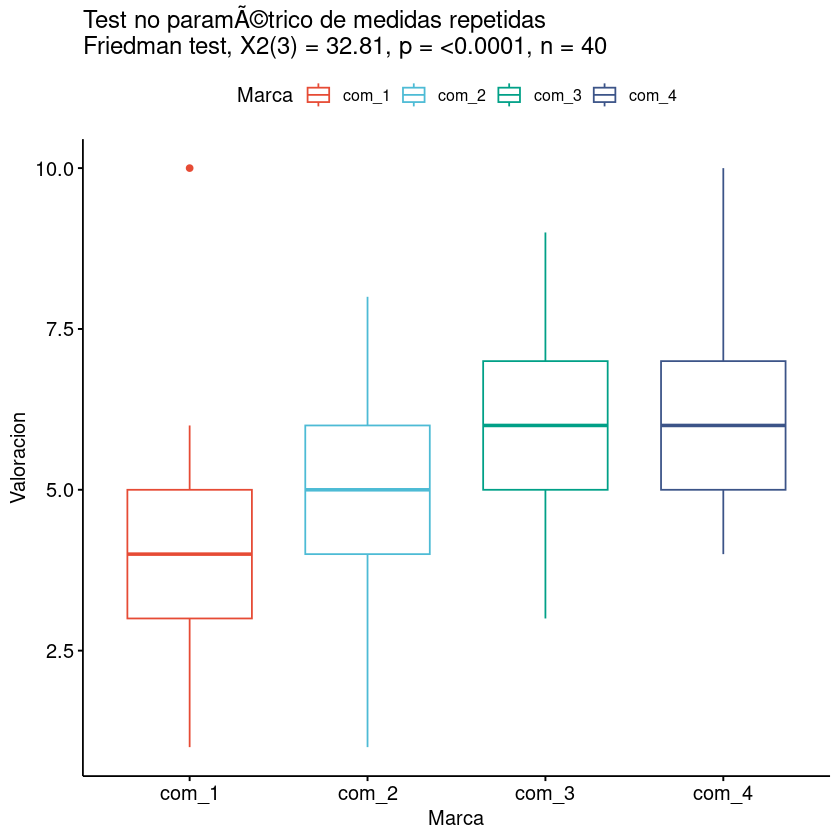

In [64]:
formula.anova.friedman_test
## Valoracion ~ Marca | id

test_friedman = friedman_test (formula.anova.friedman_test, 
                               data = datos.mr.long)
GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = FALSE, es_mr = TRUE ,
                 test_friedman)

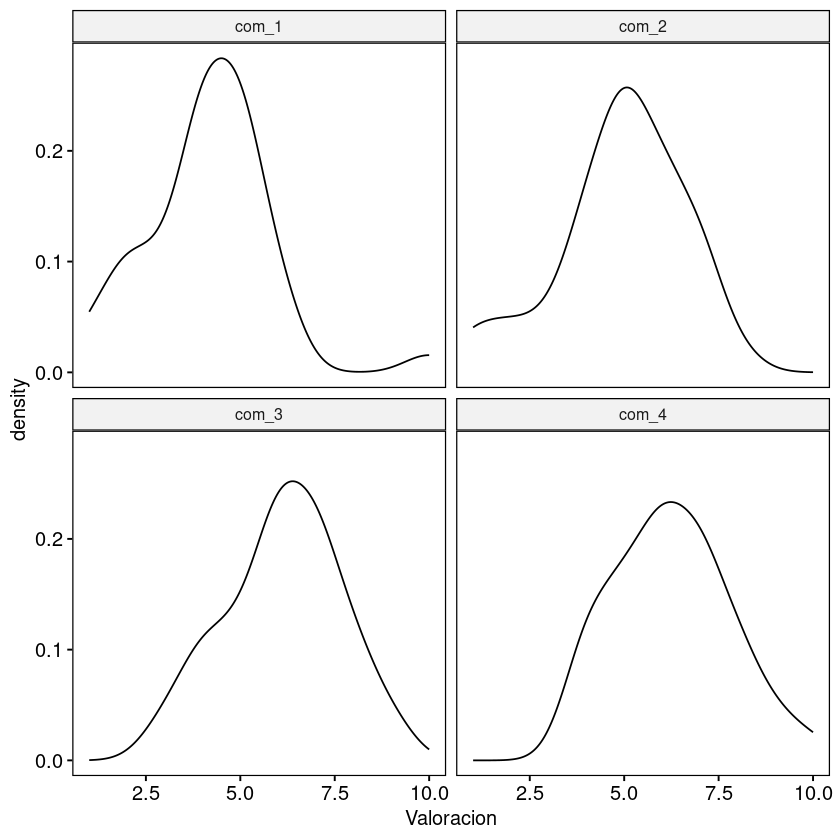

In [68]:
ggdensity(as.data.frame(datos.mr.long), v.depend.mr, facet.by = v.factor.mr)

In [69]:
col.v.depend.mr = as.data.frame(datos.mr.long)[,v.depend.mr]
col.v.factor.mr = as.data.frame(datos.mr.long)[,v.factor.mr]
col.id.factor.mr = as.data.frame(datos.mr.long)[,v.id.mr]

a_mostrar = c(1:6)
col.v.depend.mr[a_mostrar]
## [1] 2 6 7 6 1 7
col.v.factor.mr[a_mostrar]
## [1] com_1 com_2 com_3 com_4 com_1 com_2
## Levels: com_1 com_2 com_3 com_4
col.id.factor.mr[a_mostrar]
## [1] 1 1 1 1 2 2
## 40 Levels: 1 2 5 8 9 10 11 12 14 15 16 17 19 21 22 24 27 28 29 30 31 33 35 36 37 39 40 41 43 ... 59

[1] 2 6 7 6 1 7

[1] com_1 com_2 com_3 com_4 com_1 com_2
Levels: com_1 com_2 com_3 com_4

[1] 1 1 1 1 2 2
40 Levels: 1 2 5 8 9 10 11 12 14 15 16 17 19 21 22 24 27 28 29 30 31 33 ... 59

In [70]:
post_frd_durbin_Jamovi <- durbinAllPairsTest(y = col.v.depend.mr ,
                                             groups = col.v.factor.mr,
                                             blocks = col.id.factor.mr,
                                             p.adjust.method = "none")

post_frd_durbin_holm <- durbinAllPairsTest(y = col.v.depend.mr,
                                            groups = col.v.factor.mr,
                                            blocks = col.id.factor.mr,
                                            p.adjust.method = "holm")
post_frd_durbin_Jamovi
##       com_1   com_2  com_3 
## com_2 0.0325  -      -     
## com_3 2.1e-07 0.0011 -     
## com_4 2.1e-07 0.0011 1.0000

post_frd_durbin_holm
##       com_1   com_2  com_3 
## com_2 0.0651  -      -     
## com_3 1.3e-06 0.0043 -     
## com_4 1.3e-06 0.0043 1.0000


	Pairwise comparisons using Durbin's all-pairs test for a two-way balanced incomplete block design


data: col.v.depend.mr, col.v.factor.mr and col.id.factor.mr



P value adjustment method: none



      com_1   com_2  com_3 
com_2 0.0325  -      -     
com_3 2.1e-07 0.0011 -     
com_4 2.1e-07 0.0011 1.0000


	Pairwise comparisons using Durbin's all-pairs test for a two-way balanced incomplete block design


data: col.v.depend.mr, col.v.factor.mr and col.id.factor.mr



P value adjustment method: holm



      com_1   com_2  com_3 
com_2 0.0651  -      -     
com_3 1.3e-06 0.0043 -     
com_4 1.3e-06 0.0043 1.0000

In [71]:
post_frd_eisinga <- frdAllPairsExactTest(y = col.v.depend.mr ,
                                         groups = col.v.factor.mr,
                                         blocks = col.id.factor.mr,
                                         p.adjust.method = "holm")

post_frd_eisinga


	Pairwise comparisons using Eisinga, Heskes, Pelzer & Te Grotenhuis all-pairs test with exact p-values for a two-way balanced complete block design


data: y, groups and blocks



P value adjustment method: holm



      com_1   com_2 com_3
com_2 0.182   -     -    
com_3 4.5e-05 0.032 -    
com_4 4.5e-05 0.032 1.000

Valoracion ~ Marca

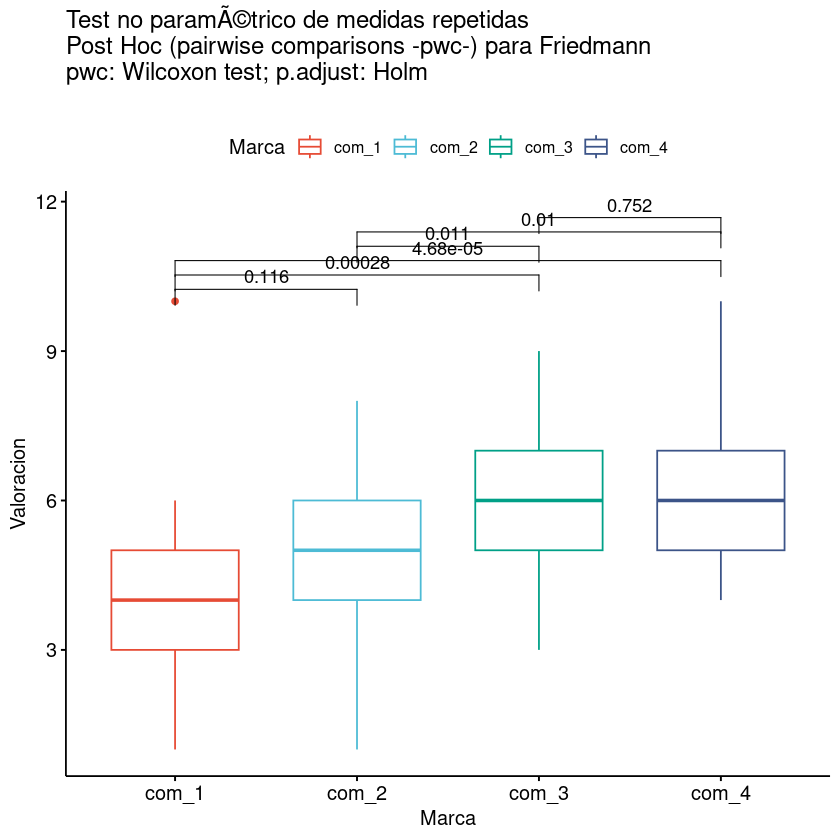

In [72]:
formula.mr.sin.error = as.formula(paste0(v.depend.mr, "~", v.factor.mr))
formula.mr.sin.error
## Valoracion ~ Marca

post_pw_wilcox_test_mr = wilcox_test(formula.mr.sin.error, 
                                     data = datos.mr.long,
                                     paired = TRUE)   
GraficoCajasPost(datos.mr.long, v.depend.mr, v.factor.mr, 
                 es_param =  FALSE, es_mr = TRUE, post_pw_wilcox_test_mr)

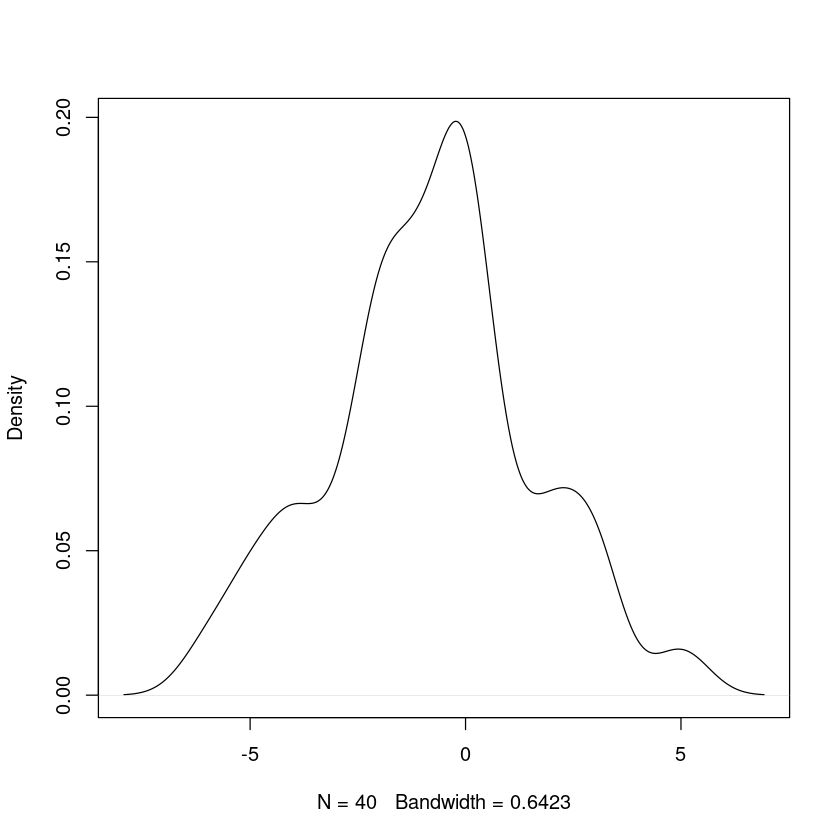

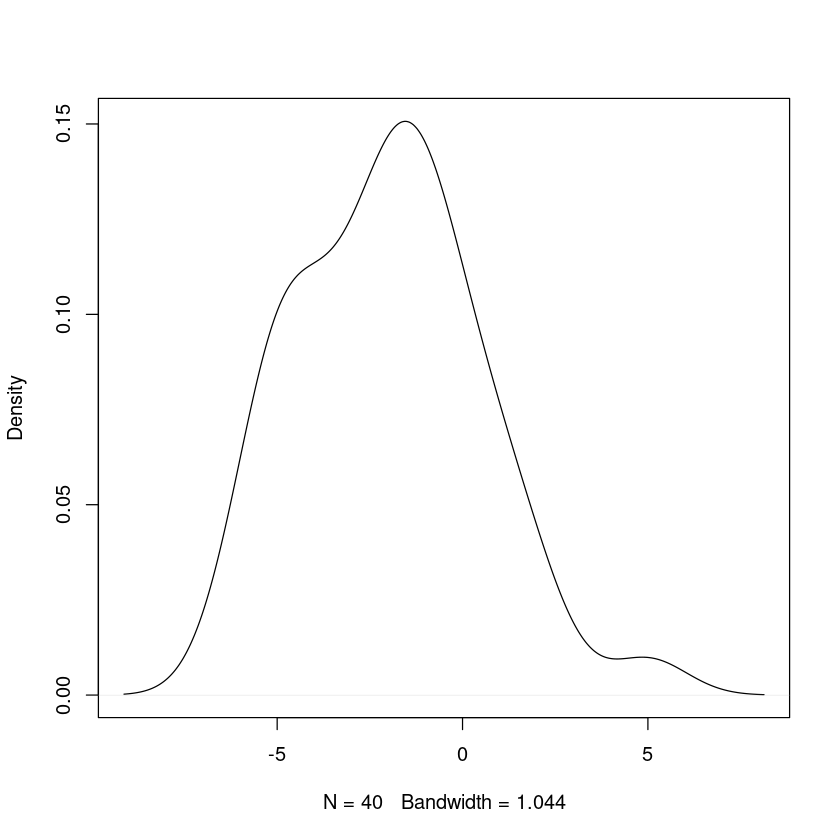

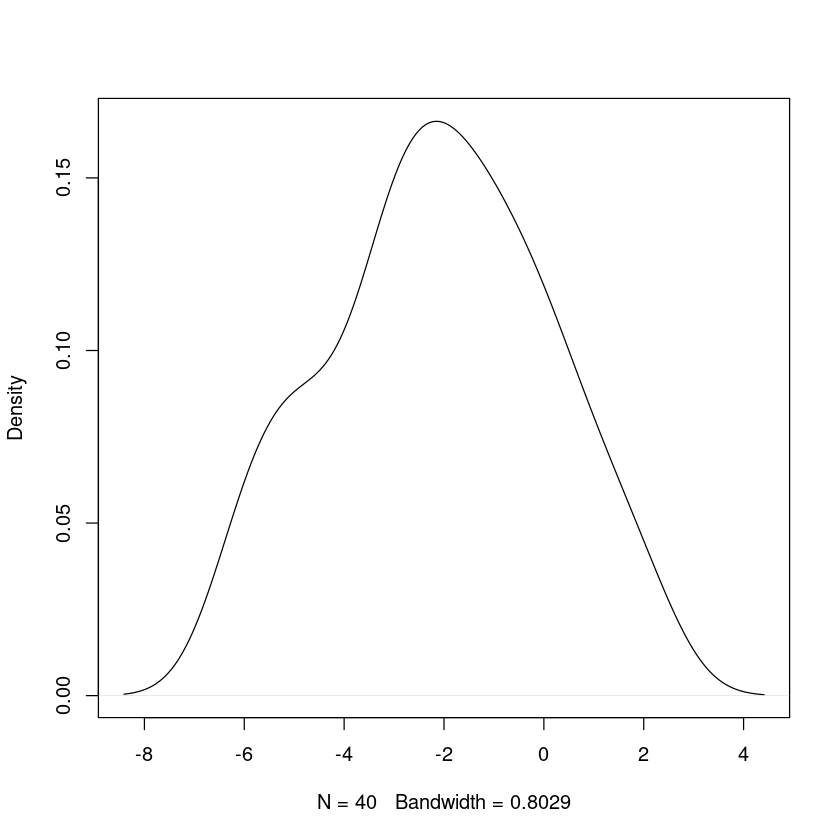

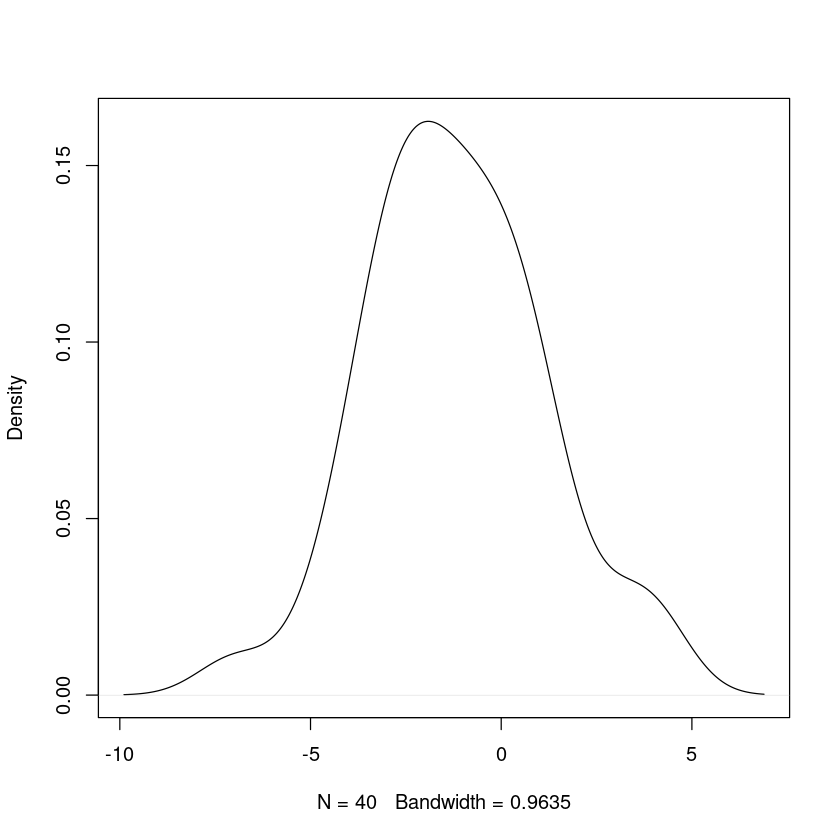

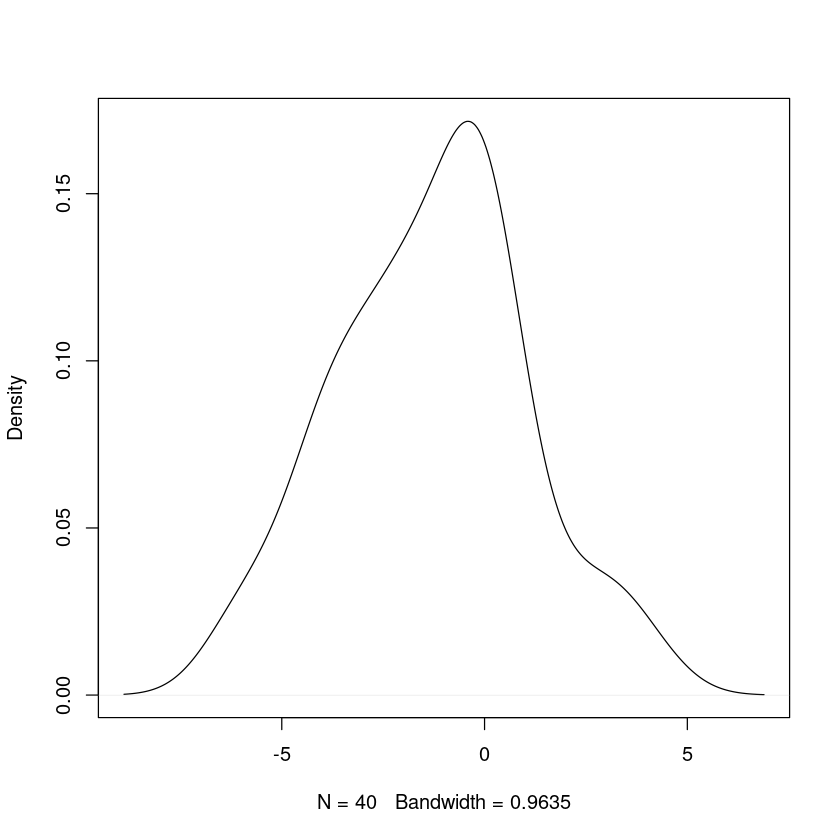

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

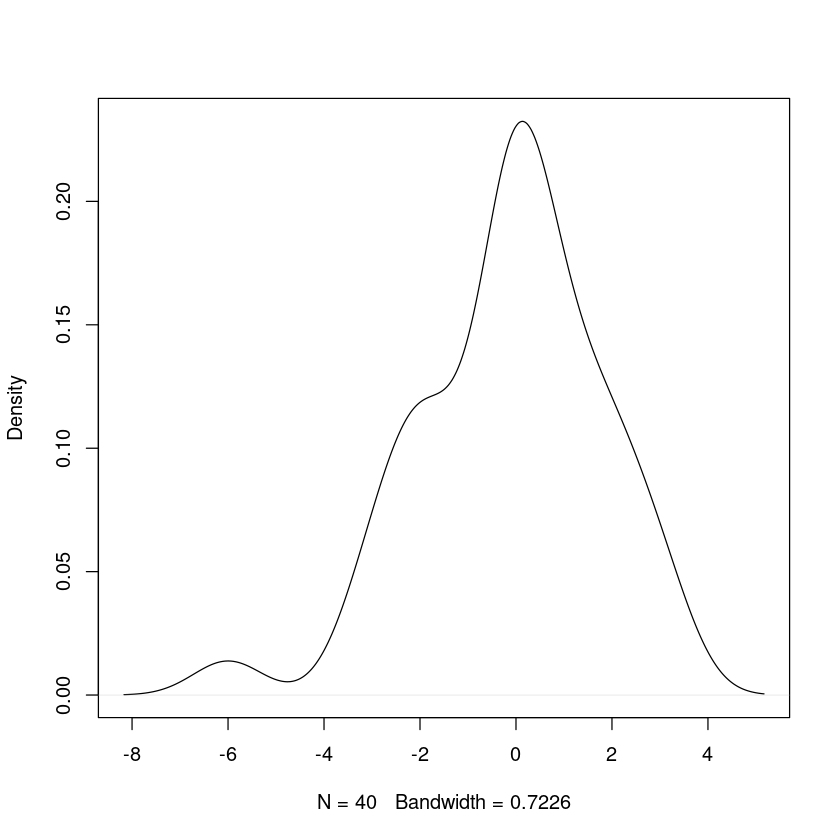

In [73]:
comb = CombPairs(columnas.mr)
  
sapply(c(1:nrow(comb)) , 
       function(x) plot (density( datos.mr.wide[comb[x,1]][,1] -  datos.mr.wide[comb[x,2]][,1])
                         , main = ""))

## Test para comparar resultado de clasificadores

In [74]:
load("ClassificationAlgorithms.RData")
datos.mr.wide = ClassificationAlgorithms
nombres.columnas = colnames(datos.mr.wide)  
v.id.mr = nombres.columnas[1]
v.depend.mr = "TasaAcierto"
v.factor.mr = "Algoritmo"
grupo.control.mr = "Alg3"
indice.control = match(grupo.control.mr, nombres.columnas)
colnames(datos.mr.wide)[indice.control] = paste0("_", grupo.control.mr)
nombres.columnas = colnames(datos.mr.wide)  

In [75]:
columnas.mr = nombres.columnas[-c(1,2)]

In [76]:
datos.mr.long = pivot_longer(datos.mr.wide, 
                             cols = any_of(columnas.mr), 
                             names_to = v.factor.mr,
                             values_to = v.depend.mr)

head(datos.mr.long)
## # A tibble: 6 × 4
##   Dataset  Alg1 Algoritmo TasaAcierto
##   <chr>   <dbl> <chr>           <dbl>
## 1 aud      25.3 Alg2             76  
## 2 aud      25.3 _Alg3            75  
## 3 aud      25.3 Alg4             69.6
## 4 aud      25.3 Alg5             71  
## 5 aud      25.3 Alg6             70.9
## 6 aud      25.3 Alg7             57.7

indice.col.id.mr = which(colnames(datos.mr.long) == v.id.mr)
indice.col.factor.mr = which(colnames(datos.mr.long) == v.factor.mr)
datos.mr.long[,indice.col.id.mr] = as.factor(as.data.frame(datos.mr.long)[,indice.col.id.mr])
datos.mr.long[,indice.col.factor.mr] =as.factor(as.data.frame(datos.mr.long)[,indice.col.factor.mr])

col.v.depend.mr = as.data.frame(datos.mr.long)[,v.depend.mr]
col.v.factor.mr = as.data.frame(datos.mr.long)[,v.factor.mr]
col.id.factor.mr = as.data.frame(datos.mr.long)[,v.id.mr]

Dataset,Alg1,Algoritmo,TasaAcierto
<chr>,<dbl>,<chr>,<dbl>
aud,25.3,Alg2,76.0
aud,25.3,_Alg3,75.0
aud,25.3,Alg4,69.6
aud,25.3,Alg5,71.0
aud,25.3,Alg6,70.9
aud,25.3,Alg7,57.7


TasaAcierto ~ Algoritmo + Error(Dataset/Algoritmo)

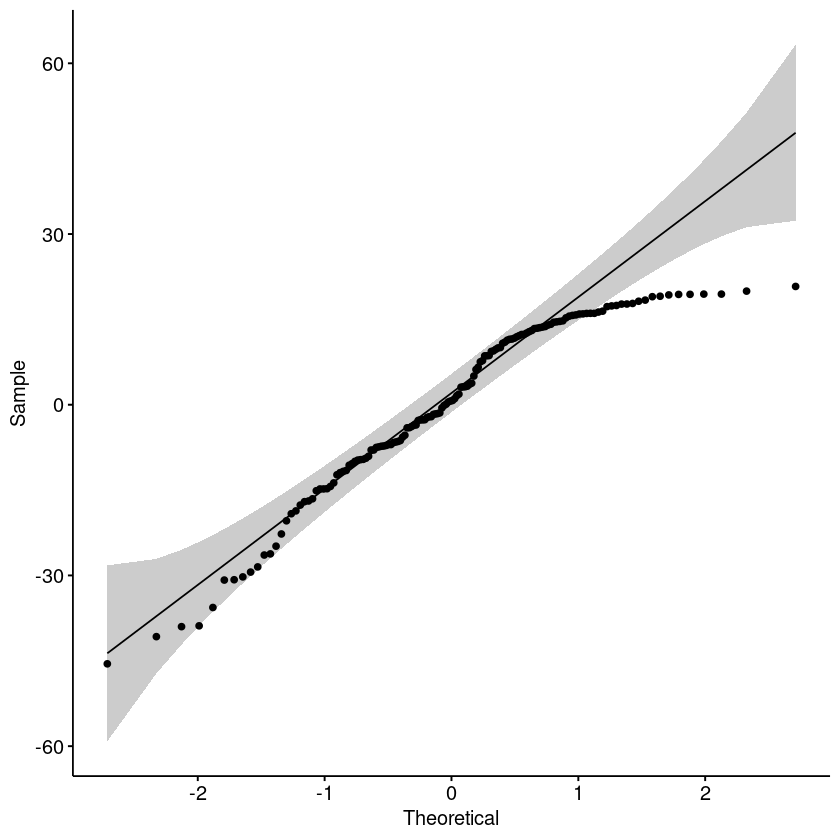

In [77]:
formula.anova.mr.error = as.formula(paste0(v.depend.mr, "~",
                                    v.factor.mr, "+ Error(" ,
                                    v.id.mr , "/" , v.factor.mr , ")"))
formula.anova.mr.error
## TasaAcierto ~ Algoritmo + Error(Dataset/Algoritmo)

residuos.mr = ResiduosMR(datos.mr.long, v.depend.mr, v.factor.mr,
                         v.id.mr, columnas.mr)
ggqqplot(residuos.mr)

In [78]:
shapiro.test(residuos.mr)


	Shapiro-Wilk normality test

data:  residuos.mr
W = 0.93373, p-value = 1.821e-06


In [79]:
formula.anova.friedman_test = as.formula(paste0(v.depend.mr, "~", 
                                                v.factor.mr , "|" , 
                                                v.id.mr))
formula.anova.friedman_test
## TasaAcierto ~ Algoritmo | Dataset

TasaAcierto ~ Algoritmo | Dataset

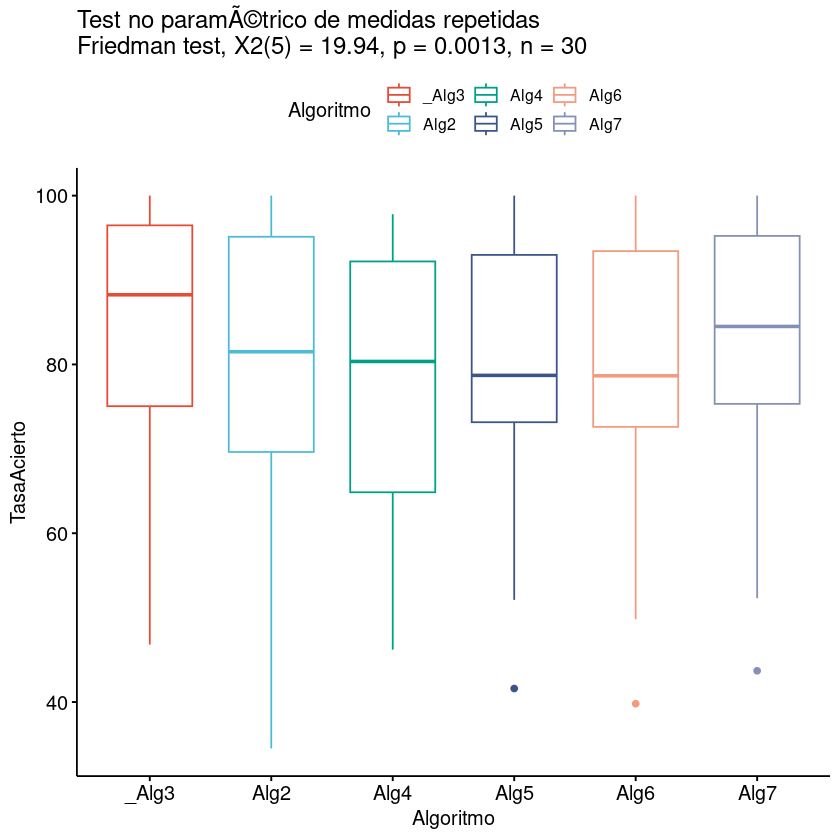

In [80]:
test_friedman = friedman_test (formula.anova.friedman_test, 
                               data = datos.mr.long)
GraficoCajasTest(datos.mr.long, v.depend.mr, v.factor.mr,
                 es_param = FALSE, es_mr = TRUE ,
                 test_friedman)

In [81]:
post_frd_eisinga <- frdAllPairsExactTest(y = col.v.depend.mr ,
                                         groups = col.v.factor.mr,
                                         blocks = col.id.factor.mr)
post_frd_eisinga


	Pairwise comparisons using Eisinga, Heskes, Pelzer & Te Grotenhuis all-pairs test with exact p-values for a two-way balanced complete block design


data: y, groups and blocks



P value adjustment method: holm



     _Alg3 Alg2  Alg4  Alg5  Alg6 
Alg2 0.032 -     -     -     -    
Alg4 0.073 1.000 -     -     -    
Alg5 0.023 1.000 1.000 -     -    
Alg6 0.023 1.000 1.000 1.000 -    
Alg7 1.000 0.220 0.391 0.185 0.185

In [82]:
post_frd_eisinga_control = frdManyOneExactTest(y = col.v.depend.mr ,
                                               groups = col.v.factor.mr,
                                               blocks = col.id.factor.mr,
                                               p.adjust.method = "holm")
post_frd_eisinga_control


	Pairwise comparisons using Eisinga-Heskes-Pelzer and Grotenhuis many-to-one test for a two-way balanced complete block design


data: y, groups and blocks



P value adjustment method: holm

alternative hypothesis: two.sided



     _Alg3 
Alg2 0.0075
Alg4 0.0121
Alg5 0.0075
Alg6 0.0075
Alg7 0.4702

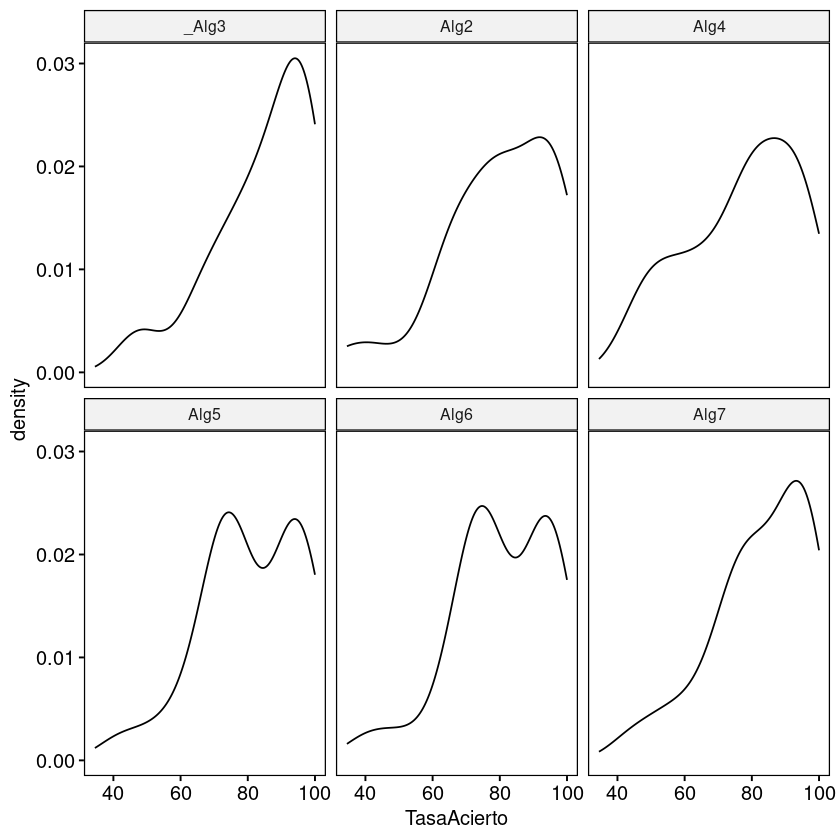

In [83]:
ggdensity(as.data.frame(datos.mr.long), v.depend.mr, facet.by = v.factor.mr)
